In [30]:
# import a package: pandas to handle data
import pandas as pd
# load Yelp data
pathfile = '/Users/Bristol Summer School 2024 Urban Analytics/Intensive Selection Camp/Urban Analytics/Yelp_response.csv'
Yelp = pd.read_csv(pathfile)
# check Yelp data
print(Yelp)


                         id                              alias  \
0    1SWx5qb0wVEhK8qnPWay5Q                pieminister-bristol   
1    zUZtE2_r5z5aKXpEDM5Jxg  hotel-du-vin-and-bistro-bristol-2   
2    X158x1G2Mn_KL-Ut1TDiDw                       poco-bristol   
3    k1OACTAqtyjtz2kMwsnY6w                  catch22-bristol-2   
4    HZAYs8vJd3B9k5taZzz7XA                the-cowshed-bristol   
..                      ...                                ...   
195  ni8K8HNOwP3hNeJlw_eMGg            pret-a-manger-bristol-2   
196  68rwiRXLni1m8AHEGZAlyA         revolution-bristol-bristol   
197  yqUVkmfv_3mROvOir29Zsg                 cafe-ronak-bristol   
198  hd_zrxLdhxpwJheHuX1OSw                  the-grace-bristol   
199  OwaXOhwmG3r_bFFnpriQnw                ciao-burger-bristol   

                      name                                          image_url  \
0              Pieminister  https://s3-media2.fl.yelpcdn.com/bphoto/HJJt54...   
1    Hotel Du Vin & Bistro  https://s3-media1

In [31]:
# import a package: json (JavaScript Object Notation) to interchange JSON data format to a python style 
## (check: https://www.freecodecamp.org/news/how-to-use-the-json-module-in-python/)
import json
Yelp = pd.DataFrame(Yelp)
print(Yelp['categories'].head())
print(Yelp['categories'].dtype)

# define a function to use latter
## insert a column of a data frame as one argument in this function 
def extract_texts(categories):
    ## skip potential errors by using 'try' and 'except'
    try:
        ## transform values of the column: categories as actual Python objects (lists of dictionaries)
        categories_list = json.loads(categories.replace("'", "\""))
        ## iterate through each dictionary within list data for each row, and get each value from the key named 'title'
        value_list = [category['title'] for category in categories_list]
        return value_list
    except json.JSONDecodeError:
        return None

# run the function and save values to a new column named Category
Yelp['Category'] = Yelp['categories'].apply(extract_texts)
print(Yelp)


0           [{'alias': 'british', 'title': 'British'}]
1    [{'alias': 'hotels', 'title': 'Hotels'}, {'ali...
2    [{'alias': 'coffee', 'title': 'Coffee & Tea'},...
3    [{'alias': 'seafood', 'title': 'Seafood'}, {'a...
4    [{'alias': 'british', 'title': 'British'}, {'a...
Name: categories, dtype: object
object
                         id                              alias  \
0    1SWx5qb0wVEhK8qnPWay5Q                pieminister-bristol   
1    zUZtE2_r5z5aKXpEDM5Jxg  hotel-du-vin-and-bistro-bristol-2   
2    X158x1G2Mn_KL-Ut1TDiDw                       poco-bristol   
3    k1OACTAqtyjtz2kMwsnY6w                  catch22-bristol-2   
4    HZAYs8vJd3B9k5taZzz7XA                the-cowshed-bristol   
..                      ...                                ...   
195  ni8K8HNOwP3hNeJlw_eMGg            pret-a-manger-bristol-2   
196  68rwiRXLni1m8AHEGZAlyA         revolution-bristol-bristol   
197  yqUVkmfv_3mROvOir29Zsg                 cafe-ronak-bristol   
198  hd_zrxLdhxpwJheHuX1OS

In [32]:
# define another function to extract texts of 'Latitude' and 'Longitude'
def extract_coordinates(coordinates):
    try:
        coordinates_dict = json.loads(coordinates.replace("'", "\""))
        # Obtain each value from each key: 'latitude' or 'longitude'
        latitude = coordinates_dict.get('latitude')
        longitude = coordinates_dict.get('longitude')
        # return both texts to a pandas Series object (e.g. a dictionary)
        return pd.Series({'Latitude': latitude, 'Longitude': longitude})
    except json.JSONDecodeError:
        return pd.Series({'Latitude': None, 'Longitude': None})
    except TypeError:
        return pd.Series({'Latitude': None, 'Longitude': None})
        
# Assign return values according to column names as Keys
Yelp[['Latitude', 'Longitude']] = Yelp['coordinates'].apply(extract_coordinates)
print(Yelp)


                         id                              alias  \
0    1SWx5qb0wVEhK8qnPWay5Q                pieminister-bristol   
1    zUZtE2_r5z5aKXpEDM5Jxg  hotel-du-vin-and-bistro-bristol-2   
2    X158x1G2Mn_KL-Ut1TDiDw                       poco-bristol   
3    k1OACTAqtyjtz2kMwsnY6w                  catch22-bristol-2   
4    HZAYs8vJd3B9k5taZzz7XA                the-cowshed-bristol   
..                      ...                                ...   
195  ni8K8HNOwP3hNeJlw_eMGg            pret-a-manger-bristol-2   
196  68rwiRXLni1m8AHEGZAlyA         revolution-bristol-bristol   
197  yqUVkmfv_3mROvOir29Zsg                 cafe-ronak-bristol   
198  hd_zrxLdhxpwJheHuX1OSw                  the-grace-bristol   
199  OwaXOhwmG3r_bFFnpriQnw                ciao-burger-bristol   

                      name                                          image_url  \
0              Pieminister  https://s3-media2.fl.yelpcdn.com/bphoto/HJJt54...   
1    Hotel Du Vin & Bistro  https://s3-media1

In [33]:
# define another function to extract texts of 'zip_code' from 'location'
def extract_zipcode(location):
    try:
        zipcode_dict = json.loads(location.replace("'", "\""))
        zip_code = zipcode_dict.get('zip_code')
        return zip_code
    except json.JSONDecodeError:
        return None
    except TypeError:
        return None

Yelp['zip_code'] = Yelp['location'].apply(extract_zipcode)
print(Yelp)


                         id                              alias  \
0    1SWx5qb0wVEhK8qnPWay5Q                pieminister-bristol   
1    zUZtE2_r5z5aKXpEDM5Jxg  hotel-du-vin-and-bistro-bristol-2   
2    X158x1G2Mn_KL-Ut1TDiDw                       poco-bristol   
3    k1OACTAqtyjtz2kMwsnY6w                  catch22-bristol-2   
4    HZAYs8vJd3B9k5taZzz7XA                the-cowshed-bristol   
..                      ...                                ...   
195  ni8K8HNOwP3hNeJlw_eMGg            pret-a-manger-bristol-2   
196  68rwiRXLni1m8AHEGZAlyA         revolution-bristol-bristol   
197  yqUVkmfv_3mROvOir29Zsg                 cafe-ronak-bristol   
198  hd_zrxLdhxpwJheHuX1OSw                  the-grace-bristol   
199  OwaXOhwmG3r_bFFnpriQnw                ciao-burger-bristol   

                      name                                          image_url  \
0              Pieminister  https://s3-media2.fl.yelpcdn.com/bphoto/HJJt54...   
1    Hotel Du Vin & Bistro  https://s3-media1

In [34]:
# define another function to extract 'text' of consumers' comments from 'reviews'
import ast
def extract_texts(reviews):
    try:
        if isinstance(reviews, str):
            ## use the function of 'ast.literal_eval' to evalue strings containing Python literals and to handle Python's syntax for dictionaries within lists.
            reviews_list = ast.literal_eval(reviews)
            ## return values of 'text'
            if isinstance(reviews_list, list) and all(isinstance(review, dict) for review in reviews_list):
                return [review.get('text', None) for review in reviews_list]
        return None
    except (ValueError, SyntaxError) as e:
        print(f"Error processing reviews: {reviews[:100]}..., Error: {e}")
        return None

Yelp['Review'] = Yelp['reviews'].apply(extract_texts)
print(Yelp)


                         id                              alias  \
0    1SWx5qb0wVEhK8qnPWay5Q                pieminister-bristol   
1    zUZtE2_r5z5aKXpEDM5Jxg  hotel-du-vin-and-bistro-bristol-2   
2    X158x1G2Mn_KL-Ut1TDiDw                       poco-bristol   
3    k1OACTAqtyjtz2kMwsnY6w                  catch22-bristol-2   
4    HZAYs8vJd3B9k5taZzz7XA                the-cowshed-bristol   
..                      ...                                ...   
195  ni8K8HNOwP3hNeJlw_eMGg            pret-a-manger-bristol-2   
196  68rwiRXLni1m8AHEGZAlyA         revolution-bristol-bristol   
197  yqUVkmfv_3mROvOir29Zsg                 cafe-ronak-bristol   
198  hd_zrxLdhxpwJheHuX1OSw                  the-grace-bristol   
199  OwaXOhwmG3r_bFFnpriQnw                ciao-burger-bristol   

                      name                                          image_url  \
0              Pieminister  https://s3-media2.fl.yelpcdn.com/bphoto/HJJt54...   
1    Hotel Du Vin & Bistro  https://s3-media1

In [36]:
import os
os.chdir('/Users/Bristol Summer School 2024 Urban Analytics/Intensive Selection Camp/Urban Analytics')
Yelp.to_csv('Yelp_Cleaned.csv', index=False) 


In [4]:
## Word Cloud and Yelp
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
# Read the file
examples = pd.read_csv('/Users/Bristol Summer School 2024 Urban Analytics/Intensive Selection Camp/Urban Analytics/Foursquare_response.csv')# make sure the directory is correct in your case

In [7]:
# How does it look?
examples.head()

,Name,Category,Latitude,Longitude,Address
0,Pinkmans,Bakery,51.455421,-2.604227,"85 Park St, Bristol, BS1 5PJ"
1,Bristol City Museum and Art Gallery,History Museum,51.456186,-2.605088,"Queens Rd (West End), Bristol, BS8 1RL"
2,Beerd,Beer Garden,51.461178,-2.602556,"157-159 St Michaels Hill, Cotham, Bristol, BS2..."
3,Brandon Hill,Park,51.453331,-2.606786,"Brandon Hil, Bristol, BS1 5RR"
4,Everyman Cinemas,Movie Theater,51.463024,-2.609355,"Whiteladies Rd (Melrose Pl), Bristol, BS8 2NH"


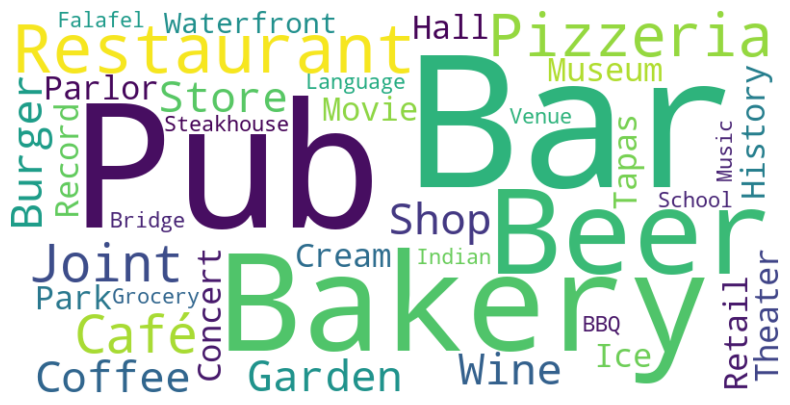

In [8]:
text = ' '.join(examples['Category'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

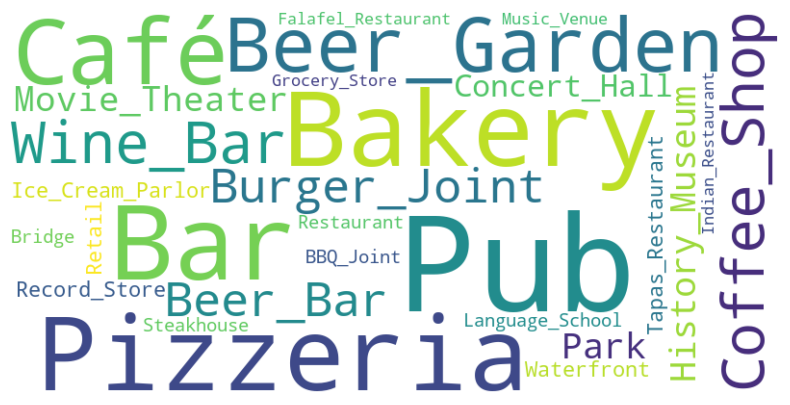

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace the spaces in the Category column with underscores.
modified_categories = examples['Category'].str.replace(' ', '_')

# Join into a single string
text = ' '.join(modified_categories)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
Yelp_dataset=pd.read_csv('/Users/Bristol Summer School 2024 Urban Analytics/Intensive Selection Camp/Urban Analytics/Yelp_cleaned(new).csv')


In [15]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize


In [16]:
corpus = [word_tokenize(review.lower()) for review in Yelp_dataset['Review']]# Tokenize each review in the Yelp_dataset, converting all text to lowercase

In [17]:
dictionary = Dictionary(corpus)#create a dictionary
print(dictionary)

Dictionary<2781 unique tokens: ["'pieminister", 'adore', 'drastic', 'like', 'love']...>


In [18]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]#Create document-term matrix
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(3, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(3, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1)],
 [(3, 1),
  (16, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(4, 1),
  (36, 1),
  (46, 1),
  (57, 1),
  (61, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)],
 [(28, 1),
  (57, 1),
  (66, 1),
  (75, 1),
  (77, 

In [29]:
num_topics = 2
lda_model = LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=None,
)
#Adjust the above parameters and observe what happens.

In [30]:
# print topic words
for topic_idx, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print(f"Topic {topic_idx}:")
    print(" ".join([word for word, _ in topic]))

Topic 0:
place one food good great really bristol like best pizza
Topic 1:
food place restaurant bristol great good little pub one nice


In [31]:
lda_model.print_topics()

[(0,
  '0.012*"place" + 0.010*"one" + 0.010*"food" + 0.009*"good" + 0.009*"great" + 0.007*"really" + 0.006*"bristol" + 0.005*"like" + 0.005*"best" + 0.004*"pizza"'),
 (1,
  '0.017*"food" + 0.011*"place" + 0.009*"restaurant" + 0.009*"bristol" + 0.008*"great" + 0.008*"good" + 0.006*"little" + 0.006*"pub" + 0.006*"one" + 0.005*"nice"')]

In [25]:
count = 0
for i in lda_model[doc_term_matrix]:
    print("doc: ", count, i)
    count+=1

doc:  0 [(0, 0.94682074), (1, 0.026756665), (2, 0.026422627)]
doc:  1 [(0, 0.0919891), (1, 0.0308492), (2, 0.87716174)]
doc:  2 [(0, 0.023072952), (1, 0.955931), (2, 0.020996002)]
doc:  3 [(0, 0.9561764), (1, 0.022601519), (2, 0.021222038)]
doc:  4 [(0, 0.026294421), (1, 0.041198146), (2, 0.93250746)]
doc:  5 [(0, 0.7537155), (1, 0.02110624), (2, 0.22517826)]
doc:  6 [(0, 0.9570314), (1, 0.022156106), (2, 0.020812443)]
doc:  7 [(0, 0.029405568), (1, 0.3946961), (2, 0.57589835)]
doc:  8 [(0, 0.019877741), (1, 0.9599496), (2, 0.020172687)]
doc:  9 [(0, 0.9440515), (1, 0.02360052), (2, 0.03234802)]
doc:  10 [(0, 0.946393), (1, 0.02692229), (2, 0.026684698)]
doc:  11 [(0, 0.93987435), (1, 0.03174695), (2, 0.028378706)]
doc:  12 [(0, 0.022982499), (1, 0.027449831), (2, 0.9495677)]
doc:  13 [(0, 0.02224525), (1, 0.022137137), (2, 0.9556176)]
doc:  14 [(0, 0.9577965), (1, 0.02160778), (2, 0.020595705)]
doc:  15 [(0, 0.024451107), (1, 0.95226645), (2, 0.023282427)]
doc:  16 [(0, 0.026229598), 